In [1]:
import numpy as np
# import datetime
# import pandas as pd
# import fnmatch
# import os
import matplotlib.pyplot as plt
# from datetime import timedelta
# from datetime import datetime
import pickle
import matplotlib.gridspec as gridspec
# import kuka_utils as u
# from skgstat import Variogram
# from skgstat import models
# from scipy.optimize import curve_fit

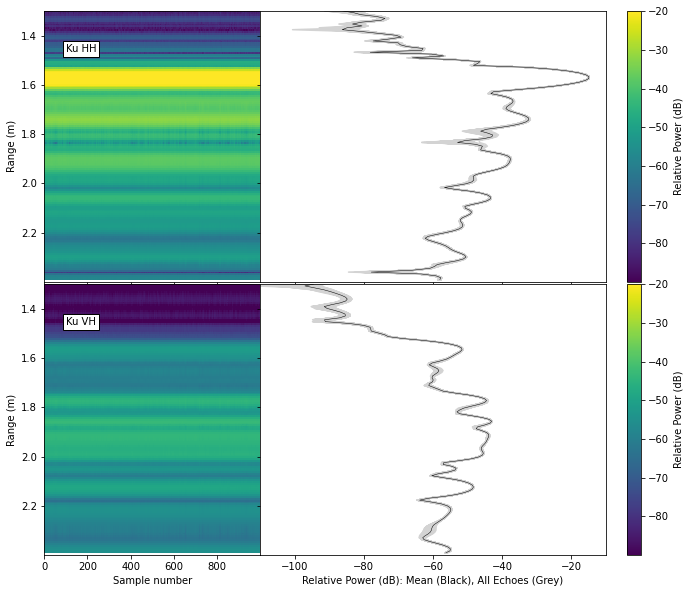

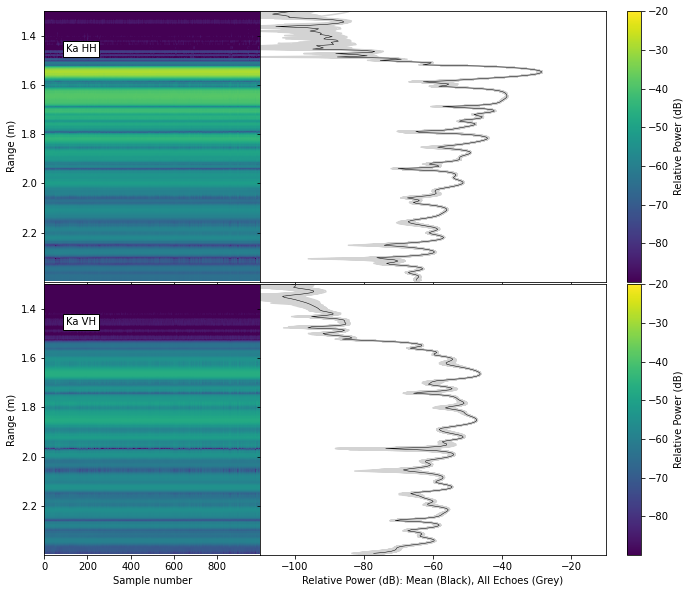

In [2]:
file_path = '/Volumes/bigLacie/processed_stare_new_nrcs/'
yrange = [0,4]
band = ['Ku', 'Ka']

date = '20200102'
pols = np.array(['hh', 'vh'])
yrange = [1.301, 2.399]
vmin = -89.9
vmax = -20

for b in band:
    
    if b == 'Ku':
        start = 6100
    if b == 'Ka':
        start = 9300
    stop = start+1000
    
    x_y_p = pickle.load( open( file_path + '/x_y_p/x_y_p_'+date+'_'+b+'.p', "rb" ) )  
    r0 = np.where(abs(x_y_p['range'] - min(yrange)) == min(abs(x_y_p['range'] - min(yrange))))[0][0]
    r1 = np.where(abs(x_y_p['range'] - max(yrange)) == min(abs(x_y_p['range'] - max(yrange))))[0][0]

    fig = plt.figure(figsize=(12, 10))
    gs = fig.add_gridspec(2,3, width_ratios=(10, 20, 1),
                         wspace = 0,
                         hspace = 0.01
                         )
    for pol in pols:
        pindex = np.where(pols == pol)[0][0]
        index = pindex
        ax0 = fig.add_subplot(gs[index, 0])
        cols = ax0.pcolormesh(np.arange(x_y_p[pol][r0:r1,start:stop].shape[1]), 
                       x_y_p['range'][r0:r1], 
                       10*np.log10(x_y_p[pol][r0:r1,start:stop]),
                       vmin = vmin, vmax = vmax)
        ax0.set_ylim(yrange[1], yrange[0])
        ax0.set_ylabel('Range (m)')
        ax0.set_xlabel('Sample number')
        ax0.annotate(b + ' ' + pol.upper(), (.1, .85), xycoords='axes fraction', 
                         bbox={'facecolor': 'white', 'pad': 3})

        ax2 = fig.add_subplot(gs[index, 1])
        [ax2.plot(10*np.log10(x_y_p[pol][r0:r1,i]), x_y_p['range'][r0:r1], 'lightgray') for i in np.arange(start, stop)]
        mean = np.array([np.mean((x_y_p[pol][i,start:stop])) for i in np.arange(r0, r1)])

        ax2.plot(10*np.log10(mean),
                 x_y_p['range'][r0:r1],
                 'k', linewidth = .5)
        ax2.set_xlabel('Relative Power (dB): Mean (Black), All Echoes (Grey)')
        ax2.set_xlim(-110, -10)
        ax2.set_ylim(yrange[1], yrange[0])
        ax2.set_yticklabels([])
        if (index == 0):# and (b == 'Ku'):
            ax0.set_xticklabels([])
            ax2.set_xticklabels([])
        cb = fig.colorbar(cols, ax = ax2, label = 'Relative Power (dB)')#, loc = 'left')
    plt.show()



